# Setting

In [1]:
from pf_utils import PortfolioManager as PM 
from pf_utils import FinancialRatios, METRICS, FundDownloader
from pf_widgets import WidgetUniverse, WidgetTransaction, w_date

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
path_data = 'data'
path_tran = 'transaction'

In [3]:
file_cost='transaction_cost'
kw_cost = {'cost': file_cost}

## Portfolios
*Review portfolio settings*

In [5]:
PM.review('portfolio')

Portfolio: MMT_2407, PER_2410, WTR_2407, WTR_2412, LIQ, TDF_2406, HANA_2408, SAVE_2503, FCTR, TEST


In [6]:
PM.review_portfolio('WTR_2412')

{'strategy': 'WTR',
 'universe': 'UV_WTR',
 'file': 'pf_wtr2412_static',
 'path': 'transaction'}

In [10]:
#PM.review_strategy('WTR')
PM.review_portfolio('WTR_2412', strategy=True)

{'method_select': 'Selected', 'method_weigh': 'Equally'}

In [11]:
#PM.review_universe('UV_WTR')
PM.review_portfolio('WTR_2412', universe=True)

{'universe': 'etf',
 'file': 'etfs_weather',
 'tickers': 'ETF/KR',
 'to_daily': False,
 'path': 'data'}

In [12]:
c = PM.get_cost('UV_WTR', file_cost, path_tran)
c['buy']

Cost data transaction_cost_250207.csv loaded


ticker
069500    0.004209
273130    0.004209
379800    0.004209
411060    0.004209
148070    0.004209
284430    0.004209
Name: buy, dtype: float64

# Universe

In [4]:
PM.review('universes')

Universe: UV_K200, UV_KRX, UV_LIQ, UV_WTR, UV_ETF, UV_FUND, UV_FCTR


In [5]:
WidgetUniverse

## K200

In [6]:
k200 = PM.create_universe('UV_K200')

200 securities from 2022-01-03 to 2025-03-19 uploaded.
Price data loaded


In [7]:
#k200.portfolio_data
#k200.get_names()

In [8]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1)
)
k200.download(**kw) if WidgetUniverse.values(0) else None

... done
200 securities from 2022-01-03 to 2025-03-21 downloaded.
kospi200_prices_250321.csv saved
df_prices updated
Execution time of download: 27 secs


## KRX

In [9]:
krx = PM.create_universe('UV_KRX')

2712 securities from 2019-01-02 to 2024-10-08 uploaded.
Price data loaded


In [15]:
#krx.get_names()

In [16]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    interval=5, pause_duration=1, msg=False
)
#krx.download(**kw) if WidgetUniverse.values(0) else None

## WTR

In [9]:
wtr = PM.create_universe('UV_WTR')

6 securities from 2022-01-03 to 2025-03-19 uploaded.
Price data loaded


In [10]:
wtr.get_names('selected')

0) 069500: KODEX 200
1) 379800: KODEX 미국S&P500
2) 273130: KODEX 종합채권(AA-이상)액티브
3) 411060: ACE KRX금현물
4) 148070: KIWOOM 국고채10년
5) 284430: KODEX 200미국채혼합

In [11]:
#PM.review_universe('UV_WTR')

In [12]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    #tickers = ['069500', '273130', '148070', '379800', '411060', '284430']
    tickers = 'selected'
)
wtr.download(**kw) if WidgetUniverse.values(0) else None

... done
6 securities from 2022-01-03 to 2025-03-21 downloaded.
etfs_weather_250321.csv saved
df_prices updated
Execution time of download: 1 secs


In [13]:
#wtr.save()

## FCTR

In [73]:
fctr = PM.create_universe('UV_FCTR')

7 securities from 2021-01-04 to 2024-11-22 uploaded.
Price data loaded


In [74]:
fctr.get_names()

0) LRGF: iShares U.S. Equity Factor ETF
1) MTUM: iShares MSCI USA Momentum Factor ETF
2) QUAL: iShares MSCI USA Quality Factor ETF
3) SIZE: iShares MSCI USA Size Factor ETF
4) SPY: SPDR S&P 500 ETF Trust
5) USMV: iShares MSCI USA Min Vol Factor ETF
6) VLUE: iShares MSCI USA Value Factor ETF

In [75]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    tickers=['LRGF','MTUM','QUAL','SIZE','SPY','USMV','VLUE']
    #tickers='selected'
)
fctr.download(**kw) if WidgetUniverse.values(0) else None

[*********************100%***********************]  7 of 7 completed

... done
7 securities from 2021-01-04 to 2024-12-13 downloaded.
etfs_factors_241213.csv saved
df_prices updated
Execution time of download: 1.38 secs


## FUND

In [7]:
fund = PM.create_universe('UV_FUND')

224 securities from 2005-01-31 to 2025-01-31 uploaded.
REMINDER: 224 equities converted to daily
Daily metrics in Performance statistics must be meaningless
Price data loaded


In [8]:
kw = dict(
    n_years=20, 
    #close_today = WidgetUniverse.values(1),
    #tickers='selected',
    overwrite_master=False,
    file_rate='funds_rates.csv'
)
fund.download(**kw) if WidgetUniverse.values(0) else None

100%|███████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 13.99it/s]


0.9 secs elapsed, 0.0 secs paused (0.0%)
REMINDER: Make sure starting new cumulative downloading
Cumulative Downloading set with funds_rates.csv
3 tickers set to download
Starting Cumulative Downloading where funds_rates.csv will be overwritten


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:28<00:00,  9.48s/it]


... done
3 securities from 2017-09-29 to 2025-02-28 downloaded.
funds_prices_250228.csv saved
K55234DF2657: 12
K55234DF2459: 12
K55301BU6139: 12
REMINDER: 3 equities converted to daily
Daily metrics in Performance statistics must be meaningless
df_prices updated
Execution time of download: 30.06 secs


In [15]:
#_ = fund.save()

ERROR: failed to save as funds_prices_250131.csv exists


In [16]:
#fund.portfolio_data['universe']

### Master

In [11]:
import pandas as pd
file = 'funds_categories.csv'
df_cat = pd.read_csv(f'{path_data}/{file}').set_index('ticker')
df_cat.head()

,name,seller,account,manager,asset,strategy,region
ticker,,,,,,,
K55101BT4402,한국투자TDF알아서2030증권투자신탁(주식혼합-재간접형)(C-Re),기업은행,퇴직연금,한국투자,혼합,TDF,글로벌
K55101BT4428,한국투자TDF알아서2035증권투자신탁(주식혼합-재간접형)(C-Re),기업은행,퇴직연금,한국투자,혼합,TDF,글로벌
K55101BT4444,한국투자TDF알아서2045증권투자신탁(주식혼합-재간접형)(C-Re),기업은행,퇴직연금,한국투자,혼합,TDF,글로벌
K55101BT7397,한국투자TDF알아서2040증권투자신탁(주식혼합-재간접형)(C-Re),기업은행,퇴직연금,한국투자,혼합,TDF,글로벌
K55101BY3944,한국투자TIF알아서평생소득증권자투자신탁(채권혼합-재간접형)(C-Re),기업은행,퇴직연금,한국투자,혼합,TIF,글로벌


In [6]:
file_master = 'funds_info_250325'
file_history = 'funds_prices_250325.csv'
kw = dict(
    freq='daily', batch_size=100,
    check_master=True, 
    path = path_data, msg=False,
)
fd = FundDownloader(file_master, file_historical=file_history, **kw)

*Check missing tickers in category*

In [9]:
df = fd.data_tickers.copy()
tkrs = df_cat.index.difference(df.index)
tkrs.nunique()

# uncomment to update data_tickers with category
#fd.data_tickers = pd.concat([df, df_cat.loc[tkrs, 'name']])

0

In [12]:
#overwrite=False
overwrite=True # update all conversion data
fd.update_master(overwrite=overwrite)

100%|█████████████████████████████████████████████████████████████| 242/242 [03:28<00:00,  1.16it/s]


3.5 mins elapsed, 3.4 secs paused (1.6%)


100%|█████████████████████████████████████████████████████████████| 242/242 [00:24<00:00,  9.69it/s]

25.0 secs elapsed, 0.4 secs paused (1.6%)
funds_info_250325.csv saved


### Direct

In [4]:
file_master = 'funds_info_250325'
file_history = 'funds_prices_250326.csv'
kw = dict(
    freq='daily', batch_size=100,
    check_master=True, 
    path = path_data, msg=False,
)
fd = FundDownloader(file_master, file_historical=file_history, **kw)

*check missing tickers*

In [5]:
import pandas as pd
file = 'funds_categories.csv'
df_cat = pd.read_csv(f'{path_data}/{file}').set_index('ticker')

#cond = df_cat['seller'] == '기업은행'
#cond = cond & (df_cat['account'] == '일반')
#tickers = df_cat.index[cond]
tickers = df_cat.index
tickers.difference(fd.data_tickers.index)

Index([], dtype='object', name='ticker')

In [15]:
tickers = None
fd.set_tickers(tickers=tickers)

242 tickers set to download


In [ ]:
start_date, end_date = '2024-01-01', '2025-03-25'
_ = fd.download(start_date, end_date)

In [17]:
fd.df_prices.columns.size

232

### Case: Cost
*check [Additional Data](#Additional-Data) to update cost data (file_cost)*

In [77]:
universe = 'UV_FUND'
fund = PM.create_universe(universe)
cost = PM.get_cost(universe, file=file_cost, path=path_tran)
fee = cost['fee']

224 securities from 2005-01-31 to 2025-01-31 uploaded.
REMINDER: 224 equities converted to daily
Daily metrics in Performance statistics must be meaningless
Price data loaded
Cost data transaction_cost_250207.csv loaded


In [35]:
import random
#tickers = [k for k,v in fund.security_names.items() if 'TDF2045' in v]
tickers = random.sample(list(fund.security_names.keys()), 3)
#tickers = ['K55301BU5479', 'K55234DF2988', 'K55223BT1757']
fund.get_names(tickers)

0) K55232C70460: NH-Amundi글로벌혁신기업증권자투자신탁(UH)[주식]ClassC-P1e
1) K55301CQ5219: 미래에셋친디아컨슈머증권투자신탁 1(주식)종류C-Pe
2) K55307BC6945: 유리베트남알파연금저축증권자투자신탁[주식]_C/C-e

In [78]:
tickers = ['K55307DH1659', 'K55210E77483']
fund.get_names(tickers)

0) K55210E77483: 신한빅사이클자산배분증권자투자신탁[주식혼합-파생형](종류C-pe)
1) K55307DH1659: 유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e

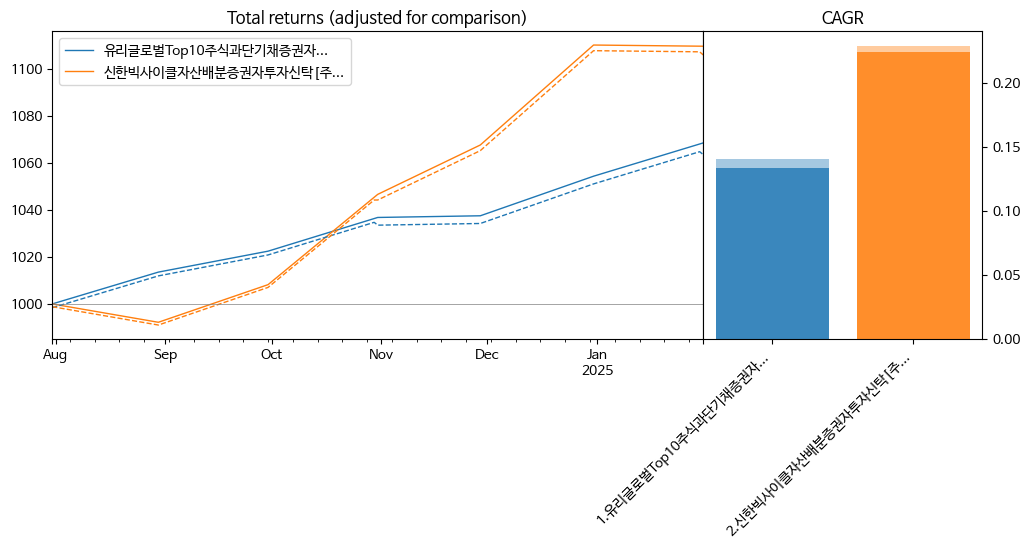

In [79]:
fund.plot(tickers, fee=fee, base=1000)

## LIQ

In [14]:
# portfolio of past trading system to liquidate soon
selected = [
    '011780', '066570', '035890', '040420', '140520', 
    '072990', '091580', '011200', '002220', '006650', 
    '136490', '064550', '460860', '040910', '024950',
    '900070', '036580', '184230', '460850', '016250',
    '001230', '049470', '217820', '109960'
]

In [15]:
liq = PM.create_universe('UV_LIQ')

24 securities from 2022-01-03 to 2025-03-19 uploaded.
Price data loaded


In [16]:
#liq.get_names()

In [17]:
kw = dict(
    n_years=3, 
    tickers= 'selected', #selected,
    close_today = WidgetUniverse.values(1),
    interval=5, pause_duration=1, msg=False
)
liq.download(**kw) if WidgetUniverse.values(0) else None

REMINDER: 24 tickers set regardless of market


100%|███████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 19.82it/s]

1.2 secs elapsed, 0.0 secs paused (0.0%)
... done
24 securities from 2022-01-03 to 2025-03-21 downloaded.
krx_liq_prices_250321.csv saved
df_prices updated
Execution time of download: 2 secs


## Additional Data

### Cost

*Check missing cost data*

In [21]:
_ = PM.check_cost('UV_FUND', file_cost, path_tran)

Cost data transaction_cost_250319.csv loaded
242 securities from 2005-01-31 to 2025-02-28 uploaded.
REMINDER: 242 equities converted to daily
Daily metrics in Performance statistics must be meaningless
Price data loaded


*Update cost data for uiniverse UV_FUND, except for which of universes updated with manual editting*

In [20]:
fund = PM.create_universe('UV_FUND')
fd = FundDownloader.create(fund)
fd.export_cost('UV_FUND', 'transaction_cost', path=path_tran, update=True)
#fd.export_cost('UV_FUND')

242 securities from 2005-01-31 to 2025-02-28 uploaded.
REMINDER: 242 equities converted to daily
Daily metrics in Performance statistics must be meaningless
Price data loaded
Data for 242 funds loaded.
Cost data transaction_cost_250207.csv loaded
Cost data saved to transaction_cost_250319.csv


### Financial Ratio

In [23]:
WidgetUniverse

In [24]:
file = 'kospi200_ratios.csv'
fr = FinancialRatios(file, path_data)

Financial ratios of 200 stocks from 2023-01-02 to 2025-01-03 loaded


In [25]:
start_fr = '2023-01-01'
universe = 'UV_K200'
freq = 'day'

if WidgetUniverse.values(0):
    tickers = PM.create_universe(universe).df_prices.columns.to_list()
    kw = dict(
        freq = freq,
        close_today = WidgetUniverse.values(1)
    )
    fr.download(tickers, start_fr, **kw)

200 securities from 2022-01-03 to 2025-02-03 uploaded.
Price data loaded


100%|█████████████████████████████████████████████████████████████| 200/200 [13:12<00:00,  3.96s/it]


13.2 mins elapsed, 30.0 secs paused (3.8%)
Financial ratios of 200 stocks from 2023-01-02 to 2025-02-03 downloaded
kospi200_ratios_250203.csv saved


In [26]:
fratio = 'PER'
df_ratio = fr.util_reshape(fratio, stack=False)

In [27]:
df = PM.create_universe(universe).df_prices
fr.util_compare_periods(df)

200 securities from 2022-01-03 to 2025-02-03 uploaded.
Price data loaded
Ratio: 2023-01-02 ~ 2025-02-03
Price: 2022-01-03 ~ 2025-02-03


# Performance

In [18]:
PM.review()

Portfolio: MMT_2407, PER_2410, WTR_2407, WTR_2412, LIQ, TDF_2406, HANA_2408, SAVE_2503, FCTR, TEST


In [19]:
pm = PM(
    'MMT_2407', 'PER_2410', 'WTR_2407', 'WTR_2412',
    **kw_cost
)

MMT_2407:
200 securities from 2022-01-03 to 2025-03-21 uploaded.
Price data loaded
Cost data transaction_cost_250319.csv loaded
Transaction record to 2025-03-14 loaded

PER_2410:
200 securities from 2022-01-03 to 2025-03-21 uploaded.
Price data loaded
Cost data transaction_cost_250319.csv loaded
Transaction record to 2024-11-11 loaded
Run check_universe to get the list of missing assets

WTR_2407:
6 securities from 2022-01-03 to 2025-03-21 uploaded.
Price data loaded
Cost data transaction_cost_250319.csv loaded
Transaction record to 2025-02-13 loaded

WTR_2412:
6 securities from 2022-01-03 to 2025-03-21 uploaded.
Price data loaded
Cost data transaction_cost_250319.csv loaded
Transaction record to 2024-12-18 loaded



In [14]:
#pm.load('LIQ')
#pm.load('TDF_2406','HANA_2408')

security_names updated
Data of tickers 009900, 016380 downloaded


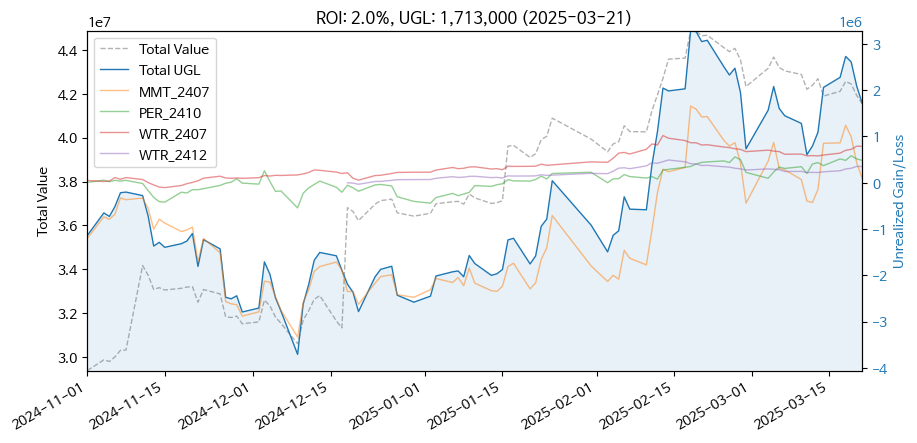

In [20]:
start_date='2024-11-01'
#pm.plot('MMT', start_date=start_date)
#pm.plot(pf_list, start_date=start_date)
pm.plot(start_date=start_date, roi=False)

In [21]:
w_date

DatePicker(value=None, layout=Layout(width='200px'), step=1)

In [22]:
pm.summary(date=w_date.value)

,MMT_2407,PER_2410,WTR_2407,WTR_2412,TOTAL
start,2024-07-22,2024-10-17,2024-07-18,2024-12-18,2024-07-18
end,2025-03-21,2025-03-21,2025-03-21,2025-03-21,2025-03-21
buy,"57,651,998","12,250,266","10,365,708","5,783,443","86,051,416"
sell,"42,650,984","2,617,050","942,797",0.0,"46,210,831"
value,"15,094,000","10,116,700","10,208,920","6,133,650","41,553,270"
ugl,"92,986","483,484","786,009","350,207","1,712,686"
roi,0.001613,0.039467,0.075828,0.060553,0.019903


*print summary for google sheet 금융자산운용*

In [57]:
pm.util_print_summary(date=w_date.value)

2025-03-17, MMT, 2407, , , , 평가, , 57649900, 42729452, 15862500, 942052, 0.016340912993777934
2025-03-17, PER, 2410, , , , 평가, , 12249820, 2621865, 10148680, 520725, 0.04250878788423007
2025-03-17, WTR, 2407, , , , 평가, , 10365272, 943120, 10062730, 640578, 0.06180040427303779
2025-03-17, WTR, 2412, , , , 평가, , 5783200, 0.0, 6042757, 259557, 0.04488120763591086


### All Funds

In [4]:
portfolios_fund = ['TDF_2406','HANA_2408','SAVE_2503']
pm = PM(*portfolios_fund, verbose=False)

TDF_2406: done
HANA_2408: done
SAVE_2503: done


In [5]:
pm.summary()

,TDF_2406,HANA_2408,SAVE_2503,TOTAL
start,2024-06-19,2024-08-01,2025-03-17,2024-06-19
end,2025-03-24,2025-03-24,2025-03-24,2025-03-24
buy,"35,000,000","9,990,000","7,067,714","52,057,714"
sell,0.0,0.0,0.0,0.0
value,"35,349,729","10,272,607","7,131,908","52,754,244"
ugl,"349,729","282,607","64,194","696,530"
roi,0.009992,0.028289,0.009083,0.01338


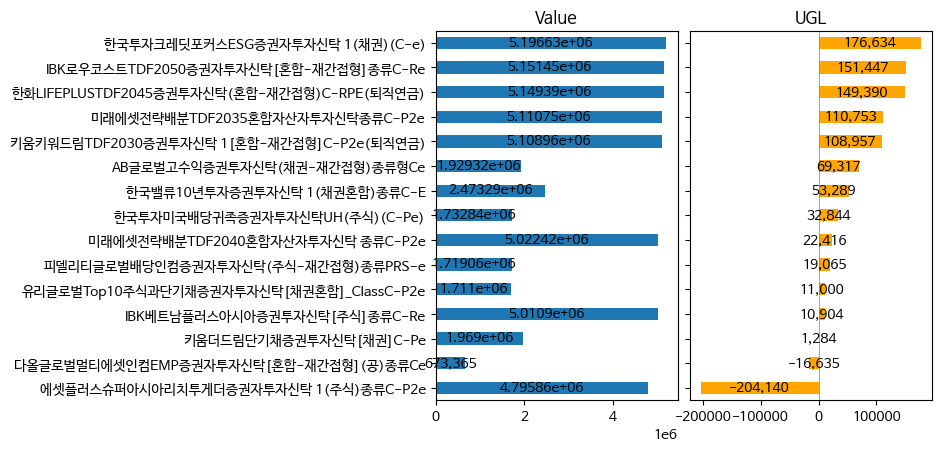

In [6]:
pm.assets(plot=True, sort_by='ugl', roi=False)

# Transaction

## MMT

In [23]:
pf_mmt = PM.create_portfolio('MMT_2407', **kw_cost) 

200 securities from 2022-01-03 to 2025-03-21 uploaded.
Price data loaded
Cost data transaction_cost_250319.csv loaded
Transaction record to 2025-03-14 loaded


In [24]:
# run after editting record file
pf_mmt.update_record()

In [25]:
pf_mmt.view_record(-2, nshares=True)

name   price  transaction  net  weight  weight*  \
date       ticker                                                           
2025-02-14 000150           두산  322499          -10    0     0.0    0.000   
           003230         삼양식품  883999            1    4     0.2    0.208   
           010120  LS ELECTRIC  238000           -1   14     0.2    0.196   
           012450    한화에어로스페이스  578000           -1    6     0.2    0.204   
           267260     HD현대일렉트릭  367500            2    9     0.2    0.195   
           298040        효성중공업  479499            7    7     0.2    0.197   
2025-03-14 000150           두산  340250            9    9     0.2    0.193   
           003230         삼양식품  923000           -1    3     0.2    0.175   
           010120  LS ELECTRIC  208500          -14    0     0.0    0.000   
           012450    한화에어로스페이스  751000           -1    3     0.2    0.189   
           042660         한화오션   76550           45   45     0.2    0.217   
           064350         현대로템  108300           33   33     0.2    0.225   
           267260     HD현대일렉트릭  356500           -9    0     0.0    0.000   
           298040        효성중공업  473000           -7    0     0.0    0.000   

                       date*  
date       ticker             
2025-02-14 000150 2025-02-17  
           003230 2025-02-17  
           010120 2025-02-17  
           012450 2025-02-17  
           267260 2025-02-17  
           298040 2025-02-17  
2025-03-14 000150 2025-03-17  
           003230 2025-03-17  
           010120 2025-03-17  
           012450 2025-03-17  
           042660 2025-03-17  
           064350 2025-03-17  
           267260 2025-03-17  
           298040 2025-03-17

*daily transactions for book keeping*

In [26]:
#pf_mmt.get_cash_history(cumsum=False, date_actual=True)

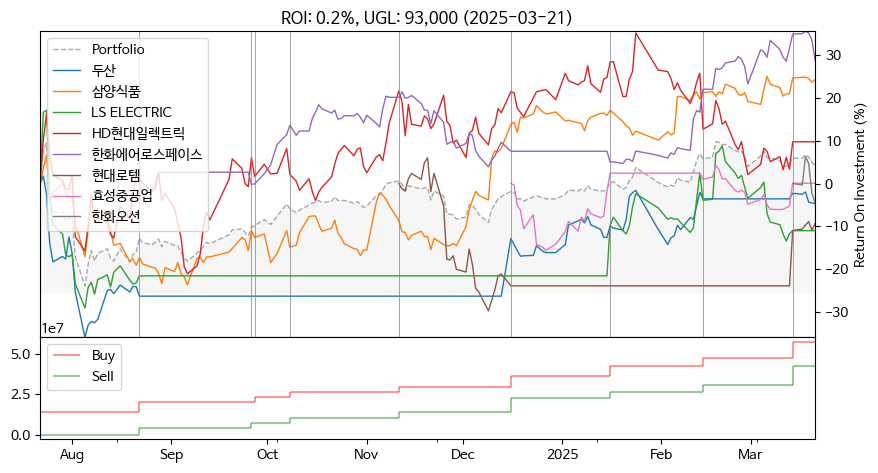

In [27]:
pf_mmt.plot(total=False)

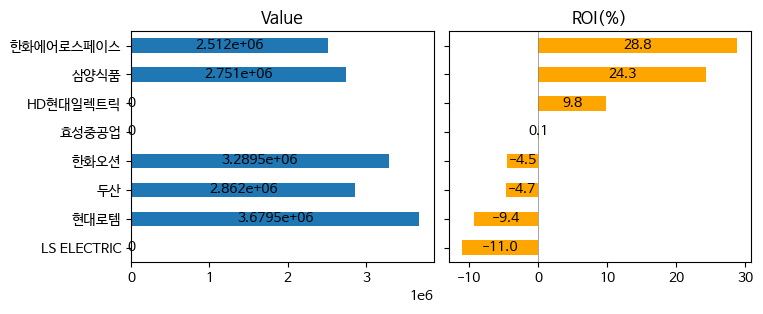

In [28]:
_ = pf_mmt.plot_assets(figsize=(8,3))

In [11]:
date = None
#date = '2025-01-17'
pf_mmt.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-07-22, 2025-03-19, 57651998, 42650984, 15993000, 991986, 0.017206438805816848


start    2024-07-22
end      2025-03-19
buy      57,651,998
sell     42,650,984
value    15,993,000
ugl         991,986
roi        0.017206
dtype: object

In [81]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [82]:
kw = dict(
    #sell = ['010120'],
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
)
#_ = pf_mmt.transaction_halt(**kw) 

In [85]:
date_actual='2025-03-17'

kw = dict(
    nshares = True,
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2),
    date_actual=date_actual
)

_ = pf_mmt.transaction_pipeline(**kw)

5 tickers selected by Total return from 2024-03-07 to 2025-03-07
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 7 %
ROI: 0.4%, UGL: 230,670 (2025-03-14)
All transactions saved to pf_k200_momentum_250314.csv


In [86]:
pf_mmt.view_record(-2, nshares=True)

name   price  transaction  net  weight  weight*  \
date       ticker                                                           
2025-02-14 000150           두산  322499          -10    0     0.0    0.000   
           003230         삼양식품  883999            1    4     0.2    0.208   
           010120  LS ELECTRIC  238000           -1   14     0.2    0.196   
           012450    한화에어로스페이스  578000           -1    6     0.2    0.204   
           267260     HD현대일렉트릭  367500            2    9     0.2    0.195   
           298040        효성중공업  479499            7    7     0.2    0.197   
2025-03-14 000150           두산  342000            9    9     0.2    0.201   
           003230         삼양식품  917000           -1    3     0.2    0.179   
           010120  LS ELECTRIC  206500          -14    0     0.0    0.000   
           012450    한화에어로스페이스  705000           -2    4     0.2    0.184   
           042660         한화오션   74300           45   45     0.2    0.218   
           064350         현대로템  101600           33   33     0.2    0.218   
           267260     HD현대일렉트릭  338500           -9    0     0.0    0.000   
           298040        효성중공업  454000           -7    0     0.0    0.000   

                       date*  
date       ticker             
2025-02-14 000150 2025-02-17  
           003230 2025-02-17  
           010120 2025-02-17  
           012450 2025-02-17  
           267260 2025-02-17  
           298040 2025-02-17  
2025-03-14 000150 2025-03-17  
           003230 2025-03-17  
           010120 2025-03-17  
           012450 2025-03-17  
           042660 2025-03-17  
           064350 2025-03-17  
           267260 2025-03-17  
           298040 2025-03-17

## KRX
*simulation*

In [40]:
pf_krx = PM.create_portfolio('KRX', **kw_cost)

ERROR: No 'KRX'. select one of MMT_2407, PER_2410, WTR_2407, WTR_2412, LIQ, TDF_2406, HANA_2408, FCTR, TEST


In [ ]:
pf_krx.view_record(-2)

In [ ]:
pf_krx.valuate()

In [22]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [23]:
kwargs_trs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2),
    nshares=True
)

_ = pf_krx.transaction_pipeline(**kwargs_trs)
pf_krx.view_record(-2)

Liquidation set to None
5 tickers selected by Total return from 2023-08-02 to 2024-08-02
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 1 %
ROI: -3.7%, UGL: -364,000  (2024-10-08)
Set save=True to save transaction record


name  ratio  transaction      net  weight  weight*  \
date       ticker                                                         
2024-09-02 078860  엔에스이엔엠      1      1998150  1998150     0.2    0.201   
           016670     디모아      1      1996800  1996800     0.2    0.201   
           033790      피노      1      1996750  1996750     0.2    0.201   
           159910   스킨앤스킨      1      1999880  1999880     0.2    0.202   
           196170    알테오젠      1      1932000  1932000     0.2    0.195   

                       date*  
date       ticker             
2024-09-02 078860 2024-09-02  
           016670 2024-09-02  
           033790 2024-09-02  
           159910 2024-09-02  
           196170 2024-09-02

## PER

In [22]:
file = 'kospi200_ratios.csv'
df_ratio = FinancialRatios.util_get_ratio('PER', file, path_data)

Financial ratios of 200 stocks from 2023-01-02 to 2025-02-03 loaded


In [23]:
pf_per = PM.create_portfolio('PER_2410', df_additional=df_ratio, **kw_cost)

200 securities from 2022-01-03 to 2025-03-14 uploaded.
Price data loaded
Cost data transaction_cost_250207.csv loaded
Transaction record to 2024-11-11 loaded
Run check_universe to get the list of missing assets


*Set assets to liquidate as delisted from KOSPI200*

In [24]:
tickers_liq = pf_per.check_universe()

In [25]:
#pf_per.view_record(-2)

In [26]:
pf_per.valuate(total=True, print_msg=True, join_str=True)

security_names updated
Data of tickers 009900, 016380 downloaded
Tickers 009900, 016380 added to universe
start, end, buy, sell, value, ugl, roi
2024-10-17, 2025-03-14, 12250266, 2617050, 10003340, 370124, 0.03021357886045095


start    2024-10-17
end      2025-03-14
buy      12,250,266
sell      2,617,050
value    10,003,340
ugl         370,124
roi        0.030214
dtype: object

In [27]:
#pf_per.update_record()
#pf_per.view_record(-2)

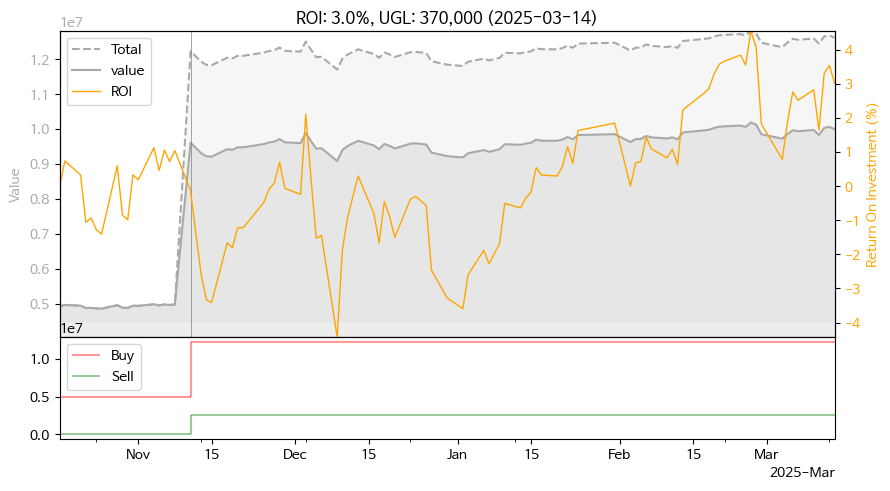

In [28]:
pf_per.plot()

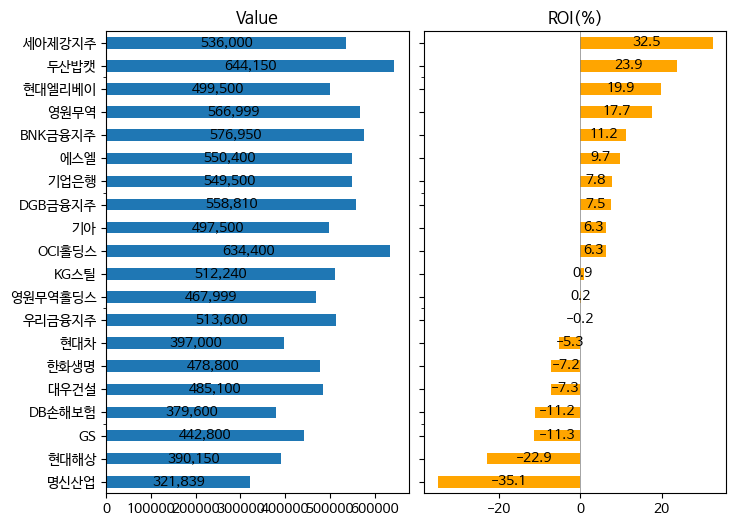

In [33]:
_ = pf_per.plot_assets(figsize=(8,6))

In [46]:
start_fr = '2023-01-01'
_ = pf_per.check_additional(start_fr)

Returning price and additional


In [47]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [49]:
kw = dict(
    #sell = tickers_liq,
    halt = tickers_liq, # testing
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
)
_ = pf_per.transaction_halt(**kw) 
#pf_per.view_record(-1)

Trading of assets 009900, 016380 to halt
Updated with transaction on 2025-02-12
Set save=True to save transaction record
ROI: -0.1%, UGL: -13,457 (2025-02-12)


In [52]:
kw = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2),
    nshares=True
)
_ = pf_per.transaction_pipeline(**kw)

20 tickers selected by Financial Ratio from 2024-12-02 to 2025-01-31
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 4 %
Tickers 009900, 016380 added to universe
ROI: 2.0%, UGL: 295,291 (2025-02-12)
Set save=True to save transaction record


In [53]:
pf_per.view_record(-1, nshares=True)

name   price  transaction  net  weight  weight*  \
date       ticker                                                       
2025-01-31 000270       기아  102000           -1    4    0.05    0.043   
           001450     현대해상   24750            2   19    0.05    0.050   
           003030   세아제강지주  205000            0    2    0.05    0.044   
           005380      현대차  206000            0    2    0.05    0.044   
           005830   DB손해보험   97100            1    5    0.05    0.052   
           005850      에스엘   32050           -1   15    0.05    0.051   
           009900     명신산업    1000         -500    0    0.00    0.000   
           009970  영원무역홀딩스   81900            1    6    0.05    0.052   
           010060   OCI홀딩스   79100           -2    6    0.05    0.050   
           016380     KG스틸    1013         -494    0    0.00    0.000   
           017800   현대엘리베이   53000           -9    0    0.00    0.000   
           024110     기업은행   15530           -4   31    0.05    0.051   
           028050    삼성E&A   18010           27   27    0.05    0.052   
           047040     대우건설    3375            6  146    0.05    0.052   
           069260   TKG휴켐스   16950           29   29    0.05    0.052   
           078930       GS   38500            0   12    0.05    0.049   
           088350     한화생명    2495           17  197    0.05    0.052   
           105630     한세실업   13150           37   37    0.05    0.052   
           111770     영원무역   43950           -1   11    0.05    0.051   
           138930  BNK금융지주   12160          -55    0    0.00    0.000   
           139130  DGB금융지주    9220          -10   53    0.05    0.052   
           241560     두산밥캣   48050           -3   10    0.05    0.051   
           316140   우리금융지주   16100           -2   30    0.05    0.051   
           383220      F&F   64300            7    7    0.05    0.048   

                       date*  
date       ticker             
2025-01-31 000270 2025-01-31  
           001450 2025-01-31  
           003030 2025-01-31  
           005380 2025-01-31  
           005830 2025-01-31  
           005850 2025-01-31  
           009900 2025-01-31  
           009970 2025-01-31  
           010060 2025-01-31  
           016380 2025-01-31  
           017800 2025-01-31  
           024110 2025-01-31  
           028050 2025-01-31  
           047040 2025-01-31  
           069260 2025-01-31  
           078930 2025-01-31  
           088350 2025-01-31  
           105630 2025-01-31  
           111770 2025-01-31  
           138930 2025-01-31  
           139130 2025-01-31  
           241560 2025-01-31  
           316140 2025-01-31  
           383220 2025-01-31

In [54]:
#pf_per.update_record()

## WTR
*modified all weather*

In [63]:
pf = 'WTR_2407'
#pf = 'WTR_2412' # 배현정
pf_wtr = PM.create_portfolio(pf, **kw_cost) 

6 securities from 2022-01-03 to 2025-03-17 uploaded.
Price data loaded
Cost data transaction_cost_250207.csv loaded
Transaction record to 2025-02-13 loaded


In [64]:
#pf_wtr.portfolio_data['strategy']
pf_wtr.update_record()

In [65]:
pf_wtr.view_record(-2, nshares=True)

name   price  transaction  net  weight  \
date       ticker                                                           
2024-11-20 069500             KODEX 200   32902            7   49  0.1670   
           148070          KOSEF 국고채10년  113034           -1   13  0.1670   
           273130  KODEX 종합채권(AA-이상)액티브  114815            0   14  0.1670   
           284430        KODEX 200미국채혼합   12585            4  128  0.1670   
           379800      KODEX 미국S&P500TR   18790           -8   86  0.1670   
           411060            ACE KRX금현물   17040          -10   96  0.1670   
2025-02-13 069500             KODEX 200   34490            1   51  0.1667   
           148070         KIWOOM 국고채10년  115030            1   15  0.1667   
           273130  KODEX 종합채권(AA-이상)액티브  117125            0   14  0.1667   
           284430        KODEX 200미국채혼합   13090            5  134  0.1667   
           379800        KODEX 미국S&P500   20215            0   86  0.1667   
           411060            ACE KRX금현물   24065          -21   75  0.1667   

                   weight*      date*  
date       ticker                      
2024-11-20 069500    0.168 2024-11-20  
           148070    0.158 2024-11-20  
           273130    0.167 2024-11-20  
           284430    0.169 2024-11-20  
           379800    0.168 2024-11-20  
           411060    0.170 2024-11-20  
2025-02-13 069500    0.168 2025-02-14  
           148070    0.165 2025-02-14  
           273130    0.157 2025-02-14  
           284430    0.168 2025-02-14  
           379800    0.168 2025-02-14  
           411060    0.173 2025-02-14

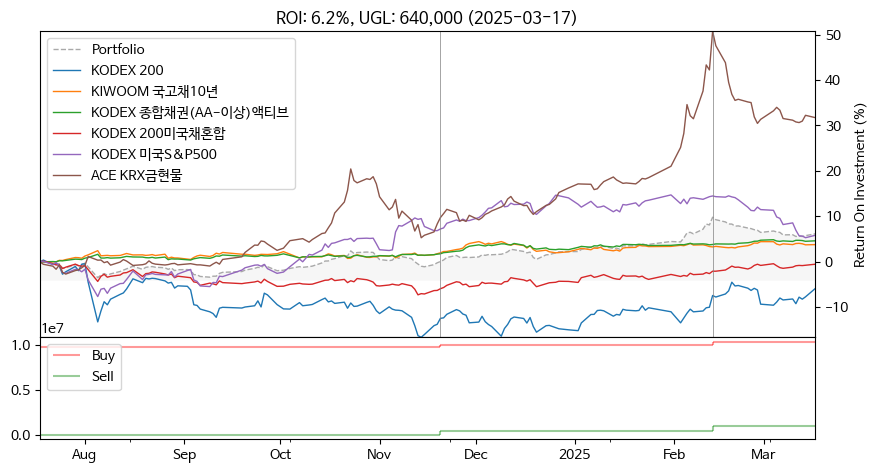

In [66]:
pf_wtr.plot(total=False)

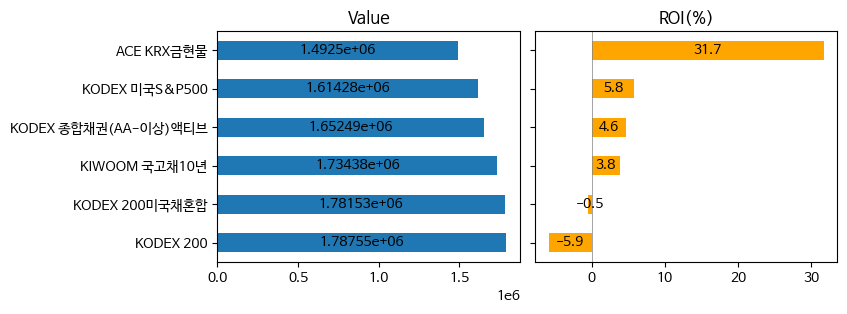

In [67]:
_ = pf_wtr.plot_assets(figsize=(8,3))

In [44]:
date = None
pf_wtr.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-07-18, 2025-02-27, 10365708, 942797, 10144010, 721099, 0.06956583291631402


start    2024-07-18
end      2025-02-27
buy      10,365,708
sell        942,797
value    10,144,010
ugl         721,099
roi        0.069566
dtype: object

In [10]:
#pf_wtr.get_cash_history(cumsum=False, date_actual=True)

In [11]:
#pf_wtr.performance(metrics=METRICS)

In [12]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [14]:
nshares = True
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2),
    nshares=nshares,
    date_actual='2024-02-17'
)
_ = pf_wtr.transaction_pipeline(**kwargs)
pf_wtr.view_record(-2, nshares=nshares)

6 tickers selected by Selected from 2025-02-14 to 2025-02-14
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 1 %
ROI: 9.3%, UGL: 961,841 (2025-02-14)
Set save=True to save transaction record


name   price  transaction  net  weight  \
date       ticker                                                           
2025-02-13 069500             KODEX 200   34490            1   51  0.1667   
           148070         KIWOOM 국고채10년  115030            1   15  0.1667   
           273130  KODEX 종합채권(AA-이상)액티브  117125            0   14  0.1667   
           284430        KODEX 200미국채혼합   13090            5  134  0.1667   
           379800        KODEX 미국S&P500   20215            0   86  0.1667   
           411060            ACE KRX금현물   24065          -21   75  0.1667   
2025-02-14 069500             KODEX 200   34365            0   50  0.1667   
           148070         KIWOOM 국고채10년  115170            0   15  0.1667   
           273130  KODEX 종합채권(AA-이상)액티브  117270            0   14  0.1667   
           284430        KODEX 200미국채혼합   13090           -2  132  0.1667   
           379800        KODEX 미국S&P500   20185           -2   85  0.1667   
           411060            ACE KRX금현물   23370            0   74  0.1667   

                   weight*      date*  
date       ticker                      
2025-02-13 069500    0.168 2025-02-14  
           148070    0.165 2025-02-14  
           273130    0.157 2025-02-14  
           284430    0.168 2025-02-14  
           379800    0.168 2025-02-14  
           411060    0.173 2025-02-14  
2025-02-14 069500    0.167 2024-02-17  
           148070    0.168 2024-02-17  
           273130    0.160 2024-02-17  
           284430    0.168 2024-02-17  
           379800    0.167 2024-02-17  
           411060    0.169 2024-02-17

## LIQ

In [12]:
pf_liq = PM.create_portfolio('LIQ', **kw_cost)

24 securities from 2022-01-03 to 2025-03-17 uploaded.
Price data loaded
Cost data transaction_cost_250207.csv loaded
Transaction record to 2024-01-03 loaded


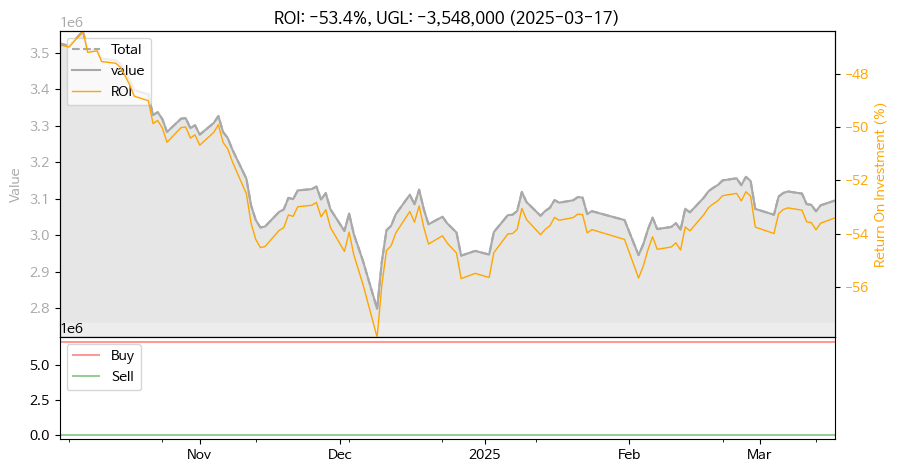

In [13]:
#date=None
date='2024-10-01'
pf_liq.plot(start_date=date)

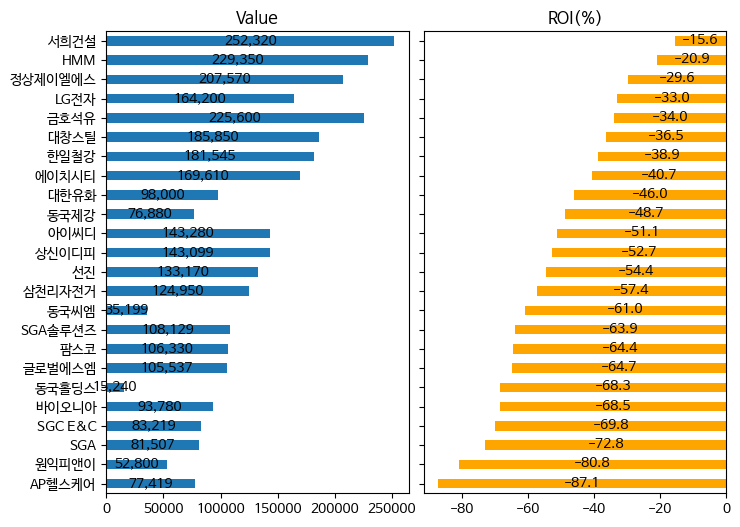

In [14]:
_ = pf_liq.plot_assets(figsize=(8,6))

In [45]:
pf_liq.valuate()

start    2024-01-03
end      2025-03-14
buy       6,642,320
sell            0.0
value     3,081,738
ugl      -3,560,582
roi       -0.536045
dtype: object

In [60]:
#pf_liq.view_record()

## TDF

In [7]:
kw_st = dict(
    method_select = 'selected'    
)

In [8]:
pf_tdf = PM.create_portfolio('TDF_2406', **kw_st, cost=file_cost)
pf_tdf.view_record()

232 securities from 2023-03-27 to 2025-03-24 uploaded.
ERROR: Set fold_size for daily price data
Check https://dis.kofia.or.kr/proframeWeb/XMLSERVICES/ first to determine the batch_size
REMINDER: 0 equities converted to daily
Daily metrics in Performance statistics must be meaningless
Price data loaded
Cost data transaction_cost_250319.csv loaded
Transaction record to 2025-01-15 loaded


name  ratio  \
date       ticker                                                             
2024-06-19 K55301BU6139              미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e      1   
           K55206C95800    키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)      1   
2025-01-15 K55206C95800    키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)      1   
           K55301BU6139              미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e      1   
           K55364CF7048          에셋플러스슈퍼아시아리치투게더증권자투자신탁 1(주식)종류C-P2e      1   
           K55234BY9966                 IBK베트남플러스아시아증권투자신탁[주식]종류C-Re      1   
           K55213C50702  한화LIFEPLUSTDF2045증권투자신탁(혼합-재간접형)C-RPE(퇴직연금)      1   
           K55234DF3150        IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re      1   
           K55301BU6253             미래에셋전략배분TDF2040혼합자산자투자신탁 종류C-P2e      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2024-06-19 K55301BU6139      5000000  5000000  0.5000    0.500 2024-06-19  
           K55206C95800      5000000  5000000  0.5000    0.500 2024-06-19  
2025-01-15 K55206C95800            0  5077506  0.1429    0.144 2025-01-15  
           K55301BU6139            0  5077009  0.1429    0.144 2025-01-15  
           K55364CF7048      5000000  5000000  0.1429    0.142 2025-01-15  
           K55234BY9966      5000000  5000000  0.1429    0.142 2025-01-15  
           K55213C50702      5000000  5000000  0.1429    0.142 2025-01-15  
           K55234DF3150      5000000  5000000  0.1429    0.142 2025-01-15  
           K55301BU6253      5000000  5000000  0.1429    0.142 2025-01-15

In [9]:
#pf_tdf.portfolio_data['strategy']
#pf_tdf.get_names()

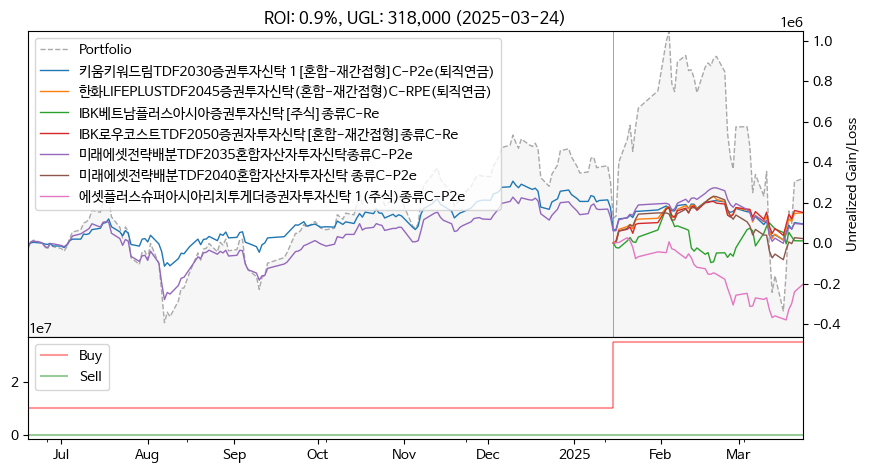

In [10]:
pf_tdf.plot(total=False, roi=False)

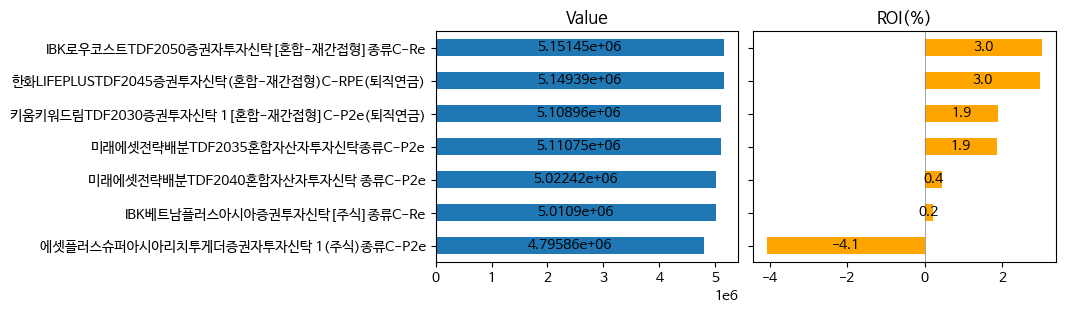

In [11]:
_ = pf_tdf.plot_assets(figsize=(8,3))

In [35]:
date = None
pf_tdf.valuate(date, print_msg=True, join_str=True)
#pf_tdf.valuate(date, total=False)

start, end, buy, sell, value, ugl, roi
2024-06-19, 2025-01-31, 35000000, -31926, 35010787, -21139, -0.0006039576067228269


start    2024-06-19
end      2025-01-31
buy      35,000,000
sell        -31,926
value    35,010,787
ugl         -21,139
roi       -0.000604
dtype: object

In [21]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [22]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_tdf.transaction_pipeline(**kwargs)

pf_tdf.view_record(-1)

7 tickers selected by Selected from 2025-01-31 to 2025-01-31
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 0 %
ROI: 1.1%, UGL: 395,347 (2025-01-31)
Set save=True to save transaction record


name  ratio  \
date       ticker                                                             
2025-01-31 K55206C95800    키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)      1   
           K55213C50702  한화LIFEPLUSTDF2045증권투자신탁(혼합-재간접형)C-RPE(퇴직연금)      1   
           K55234BY9966                 IBK베트남플러스아시아증권투자신탁[주식]종류C-Re      1   
           K55234DF3150        IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re      1   
           K55301BU6139              미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e      1   
           K55301BU6253             미래에셋전략배분TDF2040혼합자산자투자신탁 종류C-P2e      1   
           K55364CF7048          에셋플러스슈퍼아시아리치투게더증권자투자신탁 1(주식)종류C-P2e      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2025-01-31 K55206C95800      -333329  5002379  0.1429    0.143 2025-01-31  
           K55213C50702       -23720  5001866  0.1429    0.143 2025-01-31  
           K55234BY9966        76676  5002979  0.1429    0.143 2025-01-31  
           K55234DF3150         5783  5001824  0.1429    0.143 2025-01-31  
           K55301BU6139      -294521  5001709  0.1429    0.143 2025-01-31  
           K55301BU6253       -30280  5001468  0.1429    0.143 2025-01-31  
           K55364CF7048       173532  5001523  0.1429    0.143 2025-01-31

## HANA

In [18]:
kw_st = dict(
    #tickers = ['KR5101888398', 'KR5236AS4826', 'KR5370AP9956', 'K55306CV9946']
    method_select = 'selected'    
)

In [19]:
pf_hana = PM.create_portfolio('HANA_2408', **kw_st, **kw_cost)
pf_hana.view_record()

232 securities from 2023-03-27 to 2025-03-24 uploaded.
ERROR: Set fold_size for daily price data
Check https://dis.kofia.or.kr/proframeWeb/XMLSERVICES/ first to determine the batch_size
REMINDER: 0 equities converted to daily
Daily metrics in Performance statistics must be meaningless
Price data loaded
Cost data transaction_cost_250319.csv loaded
Transaction record to 2024-08-01 loaded


name  ratio  \
date       ticker                                                       
2024-08-01 KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      1   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      1   
           K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2024-08-01 KR5101888398      5020000  5020000   0.502    0.503 2024-08-01  
           KR5236AS4826      2420000  2420000   0.242    0.242 2024-08-01  
           KR5370AP9956      1860000  1860000   0.186    0.186 2024-08-01  
           K55306CV9946       690000   690000   0.069    0.069 2024-08-01

In [20]:
#pf_hana.portfolio_data['strategy']
#pf_hana.cost
#pf_hana.get_names()

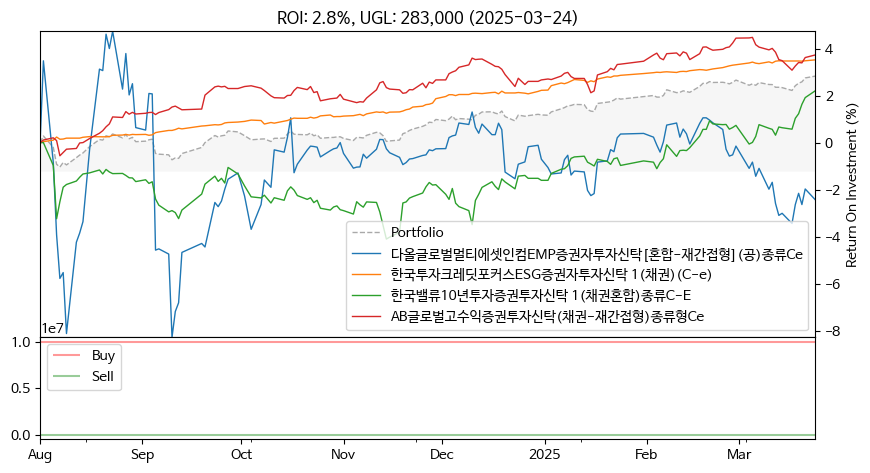

In [21]:
pf_hana.plot(total=False, roi=True)

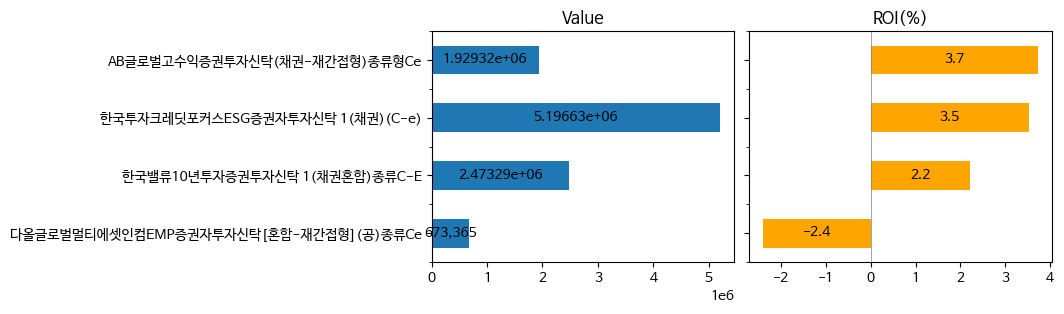

In [17]:
_ = pf_hana.plot_assets(figsize=(8,3))

In [29]:
date = None
pf_hana.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-08-01, 2025-01-31, 9990000, 0.0, 10194581, 204581, 0.0204785785785786


start    2024-08-01
end      2025-01-31
buy       9,990,000
sell            0.0
value    10,194,581
ugl         204,581
roi        0.020479
dtype: object

In [10]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [11]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_hana.transaction_pipeline(**kwargs)
pf_hana.view_record()

4 tickers selected by Selected from 2023-01-31 to 2025-01-31
Weights of tickers determined by Inv.Vol.
Mean absolute error of weights: 0 %
ROI: 1.6%, UGL: 175,993 (2025-01-31)
Set save=True to save transaction record


name  ratio  \
date       ticker                                                       
2024-08-01 K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      1   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      1   
2025-01-31 K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      1   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2024-08-01 K55306CV9946       690000   690000  0.0690    0.069 2024-08-01  
           KR5101888398      5020000  5020000  0.5020    0.503 2024-08-01  
           KR5236AS4826      2420000  2420000  0.2420    0.242 2024-08-01  
           KR5370AP9956      1860000  1860000  0.1860    0.186 2024-08-01  
2025-01-31 K55306CV9946       -81429   600255  0.0589    0.059 2025-01-31  
           KR5101888398       895986  6070462  0.5955    0.596 2025-01-31  
           KR5236AS4826      -391659  2023777  0.1986    0.199 2025-01-31  
           KR5370AP9956      -425610  1497373  0.1470    0.147 2025-01-31

## SAVE
연금저축

In [22]:
kw_st = dict(
    #tickers = ['K55101D20874', 'KR5235AK9808', 'K55307DH1659', 'K55206C11278']
    method_select = 'selected'    
)

In [23]:
pf_save = PM.create_portfolio('SAVE_2503', **kw_st, **kw_cost)
pf_save.view_record()

232 securities from 2023-03-27 to 2025-03-24 uploaded.
ERROR: Set fold_size for daily price data
Check https://dis.kofia.or.kr/proframeWeb/XMLSERVICES/ first to determine the batch_size
REMINDER: 0 equities converted to daily
Daily metrics in Performance statistics must be meaningless
Price data loaded
Cost data transaction_cost_250319.csv loaded
Transaction record to 2025-03-17 loaded


name  ratio  \
date       ticker                                                          
2025-03-17 K55101D20874             한국투자미국배당귀족증권자투자신탁UH(주식)(C-Pe)      1   
           KR5235AK9808        피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e      1   
           K55307DH1659  유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e      1   
           K55206C11278                    키움더드림단기채증권투자신탁[채권]C-Pe      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2025-03-17 K55101D20874      1700000  1700000    0.25    0.241 2025-03-13  
           KR5235AK9808      1700000  1700000    0.25    0.241 2025-03-13  
           K55307DH1659      1700000  1700000    0.25    0.241 2025-03-13  
           K55206C11278      1967714  1967714    0.25    0.278 2025-03-13

In [24]:
#pf_save.portfolio_data['strategy']
#pf_save.cost
#pf_save.get_names()

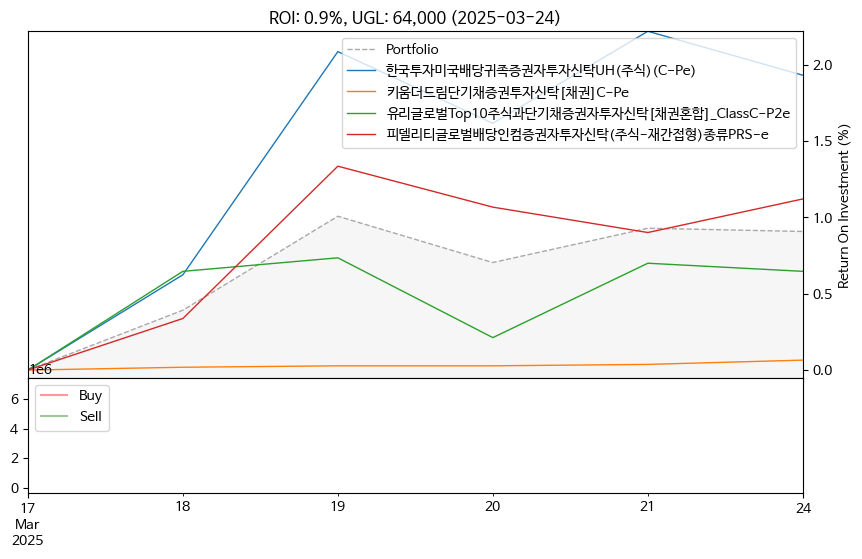

In [25]:
pf_save.plot(total=False, roi=True)

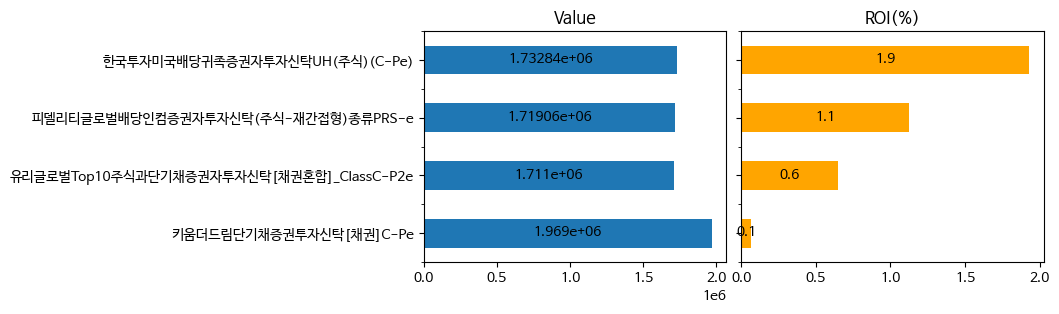

In [26]:
_ = pf_save.plot_assets(figsize=(8,3))

In [24]:
date = None
pf_save.valuate(date, print_msg=True, join_str=True)

ERROR: No transaction before 2025-02-28


In [33]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [35]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_save.transaction_pipeline(**kwargs)
pf_save.view_record()

4 tickers selected by Selected from 2024-07-31 to 2025-01-31
ERROR: check the date as no new transaction
ERROR: No transaction before 2025-01-31


name  ratio  \
date       ticker                                                          
2025-03-17 K55101D20874             한국투자미국배당귀족증권자투자신탁UH(주식)(C-Pe)      1   
           KR5235AK9808        피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e      1   
           K55307DH1659  유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e      1   
           K55206C11278                    키움더드림단기채증권투자신탁[채권]C-Pe      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2025-03-17 K55101D20874      1700000  1700000    0.25    0.241 2025-03-13  
           KR5235AK9808      1700000  1700000    0.25    0.241 2025-03-13  
           K55307DH1659      1700000  1700000    0.25    0.241 2025-03-13  
           K55206C11278      1967714  1967714    0.25    0.278 2025-03-13

In [25]:
pm.assets(sort_by='name')

name  \
portfolio ticker                                                      
HANA_2408 KR5370AP9956                 AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce   
TDF_2406  K55234DF3150        IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re   
          K55234BY9966                 IBK베트남플러스아시아증권투자신탁[주식]종류C-Re   
HANA_2408 K55306CV9946        다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce   
TDF_2406  K55301BU6139              미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e   
          K55301BU6253             미래에셋전략배분TDF2040혼합자산자투자신탁 종류C-P2e   
          K55364CF7048          에셋플러스슈퍼아시아리치투게더증권자투자신탁 1(주식)종류C-P2e   
          K55206C95800    키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)   
HANA_2408 KR5236AS4826                 한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E   
          KR5101888398              한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)   
TDF_2406  K55213C50702  한화LIFEPLUSTDF2045증권투자신탁(혼합-재간접형)C-RPE(퇴직연금)   

                            start        end        buy  sell    value  \
portfolio ticker                                                         
HANA_2408 KR5370AP9956 2024-08-01 2025-01-31  1860000.0   0.0  1922984   
TDF_2406  K55234DF3150 2025-01-15 2025-01-31  5000000.0   0.0  4996041   
          K55234BY9966 2025-01-15 2025-01-31  5000000.0   0.0  4926303   
HANA_2408 K55306CV9946 2024-08-01 2025-01-31   690000.0   0.0   681683   
TDF_2406  K55301BU6139 2024-06-19 2025-01-31  5000000.0   0.0  5107740   
          K55301BU6253 2025-01-15 2025-01-31  5000000.0   0.0  5031748   
          K55364CF7048 2025-01-15 2025-01-31  5000000.0   0.0  4827991   
          K55206C95800 2024-06-19 2025-01-31  5000000.0   0.0  5095376   
HANA_2408 KR5236AS4826 2024-08-01 2025-01-31  2420000.0   0.0  2415436   
          KR5101888398 2024-08-01 2025-01-31  5020000.0   0.0  5174476   
TDF_2406  K55213C50702 2025-01-15 2025-01-31  5000000.0   0.0  5025586   

                             ugl       roi  
portfolio ticker                            
HANA_2408 KR5370AP9956   62984.0  0.033862  
TDF_2406  K55234DF3150   -3959.0 -0.000792  
          K55234BY9966  -73697.0 -0.014739  
HANA_2408 K55306CV9946   -8317.0 -0.012054  
TDF_2406  K55301BU6139  107740.0  0.021548  
          K55301BU6253   31748.0  0.006350  
          K55364CF7048 -172009.0 -0.034402  
          K55206C95800   95376.0  0.019075  
HANA_2408 KR5236AS4826   -4564.0 -0.001886  
          KR5101888398  154476.0  0.030772  
TDF_2406  K55213C50702   25586.0  0.005117

# testing

In [27]:
from pf_utils import PortfolioManager as PM 
from pf_utils import FinancialRatios, METRICS, FundDownloader
from pf_widgets import WidgetUniverse, WidgetTransaction, w_date

import pandas as pd

In [28]:
path_data = 'data/del6'

In [29]:
file_master = 'funds_info'
kw = dict(
    file_historical = 'funds_prices',
    freq='daily',
    batch_size = 100,
    check_master=True, 
    path = 'data/del6',
    msg=False,
)

In [34]:
file_master = 'fundsm_info'
kw = dict(
    file_historical = 'fundsm_prices',
    freq='monthly',
    batch_size = 8,
    check_master=True, 
    path = 'data/del6',
    msg=False,
)

In [35]:
fd = FundDownloader(file_master, **kw)

In [31]:
#fd.update_master(overwrite=True)

In [36]:
tickers = None
fd.set_tickers(tickers=tickers)

17 tickers set to download


In [37]:
start_date, end_date = '2024-01-01', '2025-03-24'
_ = fd.download(start_date, end_date)

100%|███████████████████████████████████████████████████████████████| 17/17 [00:23<00:00,  1.37s/it]

fundsm_prices_250326.csv saved


In [10]:
fd.save('test.csv')

test_250326.csv saved


In [24]:
#fd.df_prices.apply(lambda x: 1 - x.dropna().iloc[0]/x.dropna(), axis=1).mul(100)
fd.df_prices.apply(lambda x: 1 - x.dropna().iloc[0]/x.dropna()).mul(100).round(2)

,K55234DF2657,K55234DF2459,K55301BU6139,K55105BU1161,K55210BU2385,K55206C95800,K55210BU2435,K55213C51890,K55223BT1450,K55105BS5067,K55101BY3944,K55301BU5453,K55301BU5479,K55210BU2450,K55206C96311,KR5223AE3357,K55365BT3694
date,,,,,,,,,,,,,,,,,
2023-03-29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2023-03-30,0.20,0.24,0.17,0.05,0.09,0.04,0.14,0.11,0.04,0.06,-0.17,-0.03,0.21,0.16,0.06,0.40,0.45
2023-03-31,0.65,0.77,0.84,0.67,0.64,0.77,0.88,0.73,0.98,0.83,-0.01,0.27,0.98,0.95,1.01,1.68,1.19
2023-04-03,1.21,1.40,1.45,1.16,1.11,1.23,1.51,1.51,1.62,1.40,0.51,0.56,1.69,1.66,1.64,3.01,1.81
2023-04-04,2.30,2.62,2.30,1.89,1.75,2.08,2.38,2.59,2.42,2.20,0.94,0.92,2.60,2.60,2.71,3.05,1.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-18,16.23,19.23,20.20,15.79,18.06,17.58,21.99,21.82,21.56,16.59,14.84,11.44,22.03,23.20,21.17,2.19,28.96
2025-03-19,16.80,19.85,20.72,16.29,18.45,18.10,22.49,22.48,22.16,17.17,15.23,11.76,22.60,23.74,21.84,2.30,28.94
2025-03-20,16.60,19.61,20.62,15.96,18.26,17.78,22.27,22.33,21.86,16.73,15.10,11.73,22.47,23.51,21.37,2.49,29.36


In [19]:
fd.df_prices.apply(lambda x: x.dropna().iloc[0].loc[x.name])
#fd.df_prices.apply(lambda x: x.name)

AttributeError: 'numpy.float64' object has no attribute 'loc'

In [12]:
fd.df_prices

,K55234DF2657,K55234DF2459,K55301BU6139,K55105BU1161,K55210BU2385,K55206C95800,K55210BU2435,K55213C51890,K55223BT1450,K55105BS5067,K55101BY3944,K55301BU5453,K55301BU5479,K55210BU2450,K55206C96311,KR5223AE3357,K55365BT3694
date,,,,,,,,,,,,,,,,,
2023-03-29,976.9,995.7,1209.0,1122.4,1080.0,1116.0,1171.1,1235.9,1156.5,1164.6,1046.0,1015.0,1291.8,1174.3,1126.3,1020.9,824.1
2023-03-30,978.9,998.1,1211.1,1123.0,1081.0,1116.5,1172.8,1237.2,1157.0,1165.3,1044.2,1014.7,1294.5,1176.2,1127.0,1025.0,827.8
2023-03-31,983.3,1003.4,1219.2,1130.0,1087.0,1124.7,1181.5,1245.0,1168.0,1174.3,1045.9,1017.7,1304.6,1185.6,1137.8,1038.3,834.0
2023-04-03,988.9,1009.8,1226.8,1135.6,1092.1,1129.9,1189.1,1254.9,1175.5,1181.1,1051.4,1020.7,1314.0,1194.1,1145.1,1052.6,839.3
2023-04-04,999.9,1022.5,1237.4,1144.0,1099.2,1139.7,1199.7,1268.8,1185.2,1190.8,1055.9,1024.4,1326.3,1205.7,1157.7,1053.0,835.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-18,1166.2,1232.7,1515.0,1332.9,1318.1,1354.0,1501.2,1580.8,1474.3,1396.3,1228.3,1146.1,1656.7,1529.1,1428.8,1043.8,1160.1
2025-03-19,1174.1,1242.3,1524.9,1340.8,1324.4,1362.7,1510.9,1594.4,1485.8,1406.0,1233.9,1150.3,1669.0,1539.8,1441.0,1044.9,1159.7
2025-03-20,1171.4,1238.6,1523.0,1335.6,1321.2,1357.3,1506.6,1591.2,1480.0,1398.6,1232.0,1149.9,1666.2,1535.2,1432.4,1047.0,1166.6


In [16]:
fd.df_prices.loc['2025-02-25':].apply(lambda x: 1 - fd.df_prices.loc['2025-02-25']/x, axis=1).mul(100)

,K55301BU6139,K55213C51890,K55301BU5453,K55301BU5479
date,,,,
2025-02-25,0.000000,0.000000,0.000000,0.000000
2025-02-26,-0.487586,-0.344073,-0.120679,-0.653480
2025-02-27,-0.746125,-0.168613,-0.112050,-1.018914
2025-02-28,-0.390976,0.409785,0.060231,-0.571329
2025-03-04,-0.966931,0.205313,-0.172488,-1.267978
2025-03-05,-1.280310,0.186683,-0.181128,-1.727798
2025-03-06,-2.052385,-0.861473,-0.615038,-2.623438
2025-03-07,-1.575875,-0.325244,-0.423656,-2.064844
2025-03-10,-2.092296,-0.861473,-0.728471,-2.635650


In [13]:
sr_s2

date
2024-01-15    0.00
2024-01-16   -0.02
2024-01-17    0.02
2024-01-18   -0.69
2024-01-19   -1.18
              ... 
2024-04-08   -0.04
2024-04-09    0.59
2024-04-11    0.53
2024-04-12    0.22
2024-04-15    0.23
Name: KR5213AI2357, Length: 62, dtype: float64

In [ ]:
#freq = 'monthly'
freq = 'daily'
#start_date, end_date = '2024-01-15', '2025-01-15'
#start_date, end_date = '2024-01-15', '2024-04-15'
start_date, end_date = '2010-01-15', '2010-04-15'
#_ = fd.download(start_date, end_date, file=file_history, freq=freq)
sr_s2 = fd.download_price('KR5213AI2357', start_date, end_date, freq=freq, period=2)

In [80]:
def download_rate(self, ticker, start_date, end_date, freq='monthly', 
                   percentage=True, period=24, **kwargs):
    """
    download rate data of ticker by splitting period
    period: months of each downloading
    kwargs: additional args for _download_rate
    """
    start_date, end_date = pd.DatetimeIndex([start_date, end_date])
    period = min(period, self.periods_max[freq.upper()[0]])
    unit = 100 if percentage else 1
    end = end_date
    sr_rates = None
    while end >= start_date:
        start = max(end - pd.DateOffset(months=period), start_date)
        sr_p = self._download_rate(ticker, start, end, freq=freq, **kwargs)
        if (sr_p is None) or sr_p.sum() == 0:
            break

        if sr_rates is None:
            sr_rates = sr_p
        else:
            if sr_p.index.min() == sr_rates.index.min():
                    break
            else:
                sr_p = sr_p.sort_index()
                # convert sr_rates based on sr_p
                ft = (1 + sr_p.dropna().iloc[-1] / unit)
                sr_rates = ft * (unit + sr_rates)  - unit
                # remove last date of sr_p before concat
                sr_p = sr_p.iloc[:-1] if sr_p.index.max() == sr_rates.index.min() else sr_p
                sr_rates = pd.concat([sr_rates, sr_p], axis=0)
        end = sr_rates.index.min() # include prv start date
    return sr_rates.sort_index().round(2) if sr_rates is not None else None

In [81]:
freq = 'daily'
start_date, end_date = '2024-01-15', '2025-01-15'
#start_date, end_date = '2024-01-15', '2024-04-15'
#start_date, end_date = '2010-01-15', '2010-04-15'
#start_date, end_date = '2013-10-01', '2014-04-01'
#start_date, end_date = '2013-07-01', '2013-11-30'
#_ = fd.download(start_date, end_date, file=file_history, freq=freq)
download_rate(fd, 'KR5213AI2357', start_date, end_date, freq=freq, period=7)

date
2024-01-15    0.00
2024-01-16   -0.02
2024-01-17    0.02
2024-01-18   -0.69
2024-01-19   -1.18
              ... 
2025-01-09   -4.07
2025-01-10   -3.41
2025-01-13   -3.21
2025-01-14   -3.63
2025-01-15   -3.11
Name: KR5213AI2357, Length: 246, dtype: float64

In [82]:
download_rate(fd, 'KR5213AI2357', start_date, end_date, freq=freq, period=3)

date
2024-01-15    0.00
2024-01-16   -0.02
2024-01-17    0.02
2024-01-18   -0.69
2024-01-19   -1.18
              ... 
2025-01-09   -4.07
2025-01-10   -3.41
2025-01-13   -3.21
2025-01-14   -3.63
2025-01-15   -3.10
Name: KR5213AI2357, Length: 246, dtype: float64

In [65]:
download_rate(fd, 'KR5213AI2357', start_date, end_date, freq=freq, period=4)

date
2013-12-02    0.00
2013-12-03    0.36
2013-12-04    0.36
2013-12-05   -0.51
2013-12-06   -1.10
              ... 
2014-03-26    8.65
2014-03-27    9.51
2014-03-28    9.39
2014-03-31    9.58
2014-04-01    9.33
Name: KR5213AI2357, Length: 83, dtype: float64

In [50]:
download_rate(fd, 'KR5213AI2357', start_date, end_date, freq=freq, period=7)

In [61]:
fd.download_price('KR5213AI2357', start_date, end_date, freq=freq, period=3)

date
2013-11-20     994.5
2013-11-21     994.2
2013-11-22     995.0
2013-11-25    1000.0
2013-11-26    1006.3
               ...  
2014-03-26    1103.5
2014-03-27    1112.3
2014-03-28    1111.0
2014-03-31    1113.0
2014-04-01    1110.5
Name: price, Length: 91, dtype: float64

In [49]:
download_price(fd, 'KR5213AI2357', start_date, end_date, freq=freq, period=2)

date
2013-11-20     994.5
2013-11-21     994.2
2013-11-22     995.0
2013-11-25    1000.0
2013-11-26    1006.3
               ...  
2014-03-26    1103.5
2014-03-27    1112.3
2014-03-28    1111.0
2014-03-31    1113.0
2014-04-01    1110.5
Name: price, Length: 91, dtype: float64

In [32]:
def download_rate(self, ticker, start_date, end_date, freq='m', 
                   percentage=True, period=-1, **kwargs):
    """
    download rate data of ticker by splitting period
    period: months of each downloading
    kwargs: additional args for _download_rate
    """
    start_date, end_date = pd.DatetimeIndex([start_date, end_date])
    # download w/o periods split
    if (period < 1) or (start_date == end_date):
        return self._download_rate(ticker, start_date, end_date, freq=freq, **kwargs)
    
    unit = 100 if percentage else 1
    end = end_date
    sr_rates = None
    while end >= start_date:
        start = max(end - pd.DateOffset(months=period), start_date)
        sr_p = self._download_rate(ticker, start, end, freq=freq, **kwargs)
        if sr_p is None:
            continue
        else:
            if sr_p.sum() == 0:
                break
        sr_p = sr_p.sort_index()
        if sr_rates is None:
            sr_rates = sr_p
        else:
            ft = (1 + sr_p.dropna().iloc[-1] / unit)
            sr_rates = ft * (unit + sr_rates)  - unit
            # remove last date of sr_p before concat
            sr_rates = pd.concat([sr_rates, sr_p.iloc[:-1]], axis=0)
        sr_rates = sr_rates.sort_index().round(2)
        end = sr_rates.index.min() # include prv start date
    return sr_rates

In [34]:
start_date, end_date = '2025-01-01', '2025-03-17'
#start_date, end_date = '2000-01-01', '2000-03-17'
sr2 = download_rate(fd, 'KR5213AI2357', start_date, end_date, freq='daily', period=-1)

In [35]:
cond = (sr == sr2)
cond.all()

True

In [36]:
sr2.tail()

date
2025-03-11    8.54
2025-03-12    7.55
2025-03-13    6.12
2025-03-14    5.54
2025-03-17    5.19
Name: KR5213AI2357, dtype: float64

In [23]:
sr_rates2.tail()

date
2025-03-11    8.54
2025-03-12    7.55
2025-03-13    6.12
2025-03-14    5.54
2025-03-17    5.19
Name: KR5213AI2357, dtype: float64

In [25]:
sr_rates.iloc[-1] - sr_rates2.iloc[-1]

0.0

## testing

In [8]:
a = None
if a:
    print(a)

## testing

In [1]:
from pf_utils import PortfolioManager as PM 
from pf_utils import FinancialRatios, METRICS, FundDownloader
from pf_widgets import WidgetUniverse, WidgetTransaction, w_date

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
path_data = 'data'
path_tran = 'transaction'

In [3]:
file_cost='transaction_cost'
kw_cost = {'cost': file_cost}

## Implementing

In [21]:
def test1(a):
    return a*10

def test2(a):
    return a/10

def test3(a, func):
    b = func(a)
    return a + b

test3(2, test1)

22

In [22]:
test3(2, test2)

2.2

In [26]:
class MyClass:
    def __init__(self, value):
        self.instance_variable = value  # Instance variable

    def wrapper(self, func):
        def inner(a):
            b = func(a)  # Call the original method
            return a + b + self.instance_variable  # Use instance variable
        return inner

    def test1(self, a):
        return a * 10

    def test2(self, a):
        return a / 10

    def test3(self, a):
        return self.wrapper(self.test1)(a)

# Usage
obj = MyClass(100)
print(obj.test3(5))  # Output: 105.5 (5 + 0.5 + 100)

155
